<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Carlos Daniel Pérez Hernández y Pablo Alejandro Rivera Sánchez

**Fecha:** 8 de marzo de 2021.

**Expediente** : if722627 y if721005
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$

### Ejercicio 1: 
Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 2:
Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 3:
Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 4:
Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
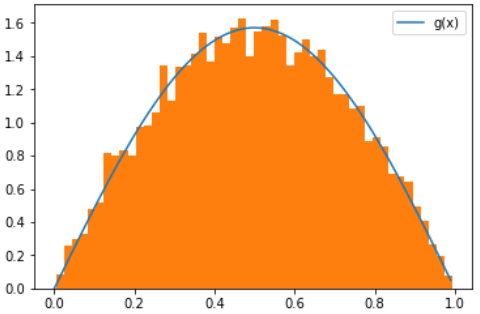

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 5:
Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
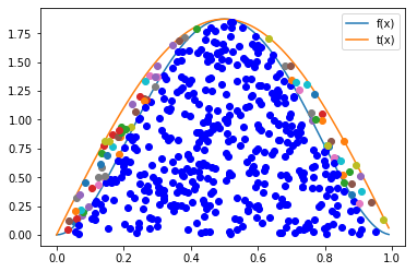

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 6:
Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``

### Ejercicio 7:
Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

#### Solución ``Pablo Alejandro Rivera Sánchez``

#### Solución ``Carlos Daniel Pérez Hernández``